# Кластеризация и метрики качества

In [1]:
import numpy as np

In [2]:
from  matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

### Данные

В sklearn.datasets есть разные наборы данных, можно выбрать другие 

In [3]:
from sklearn.datasets import make_moons

In [4]:
X, y = make_moons(n_samples=200, noise=.05, random_state=0)

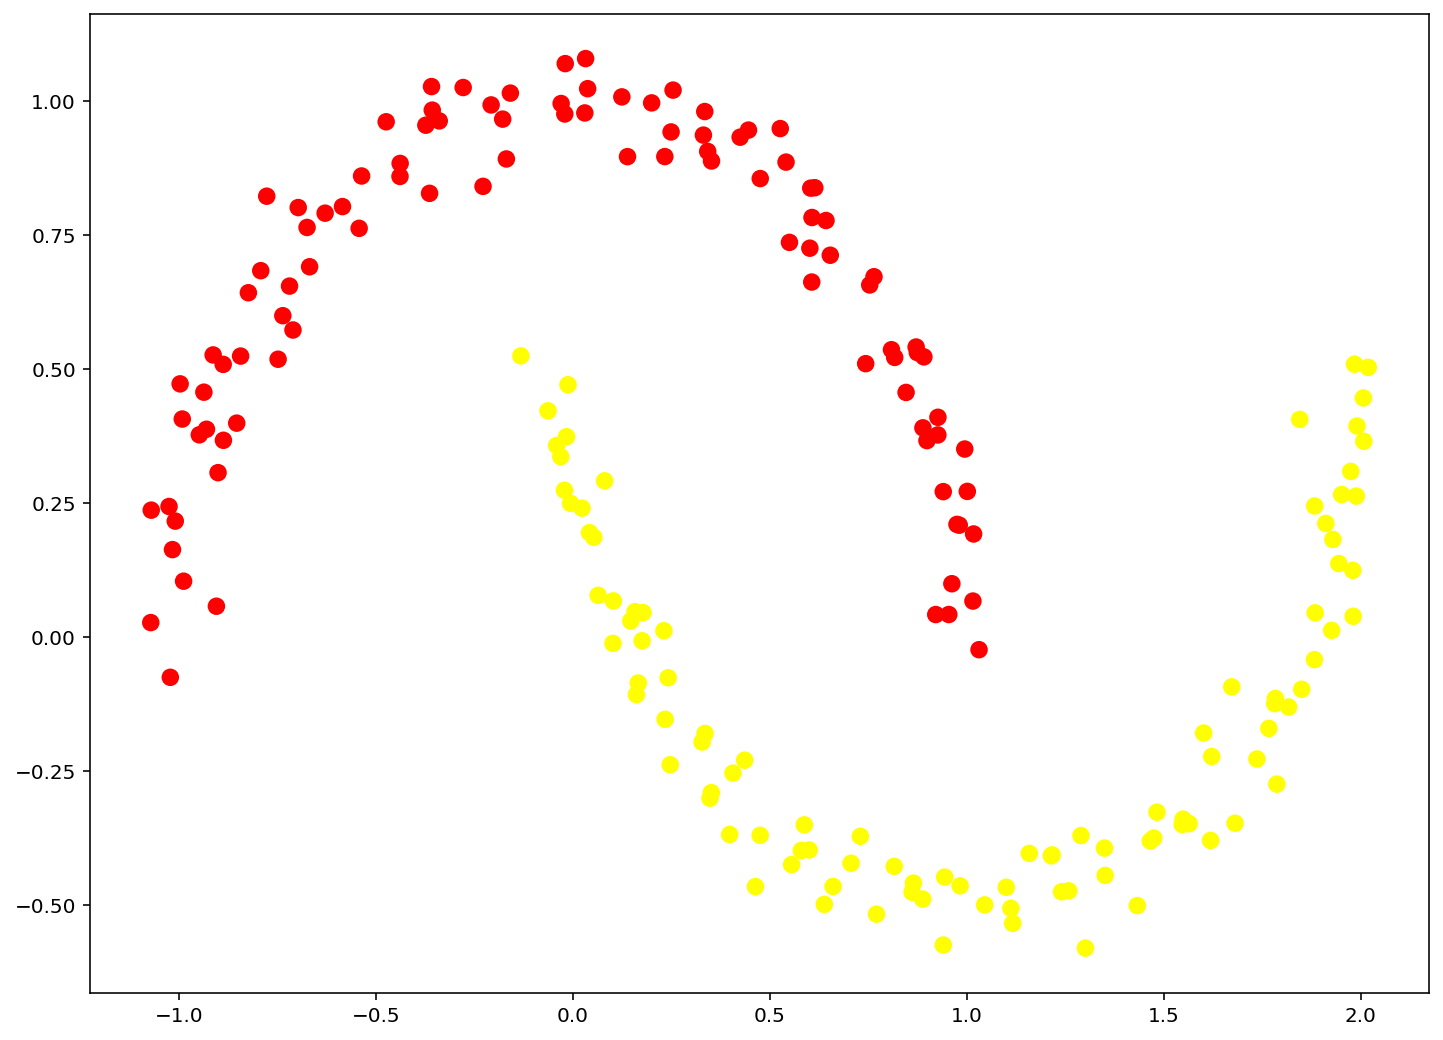

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=60)

приведем данные по обеим осям к нормальному распределению

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_scaled = scaler.fit_transform(X)

Форма осталась, но диапазоны выровнялись

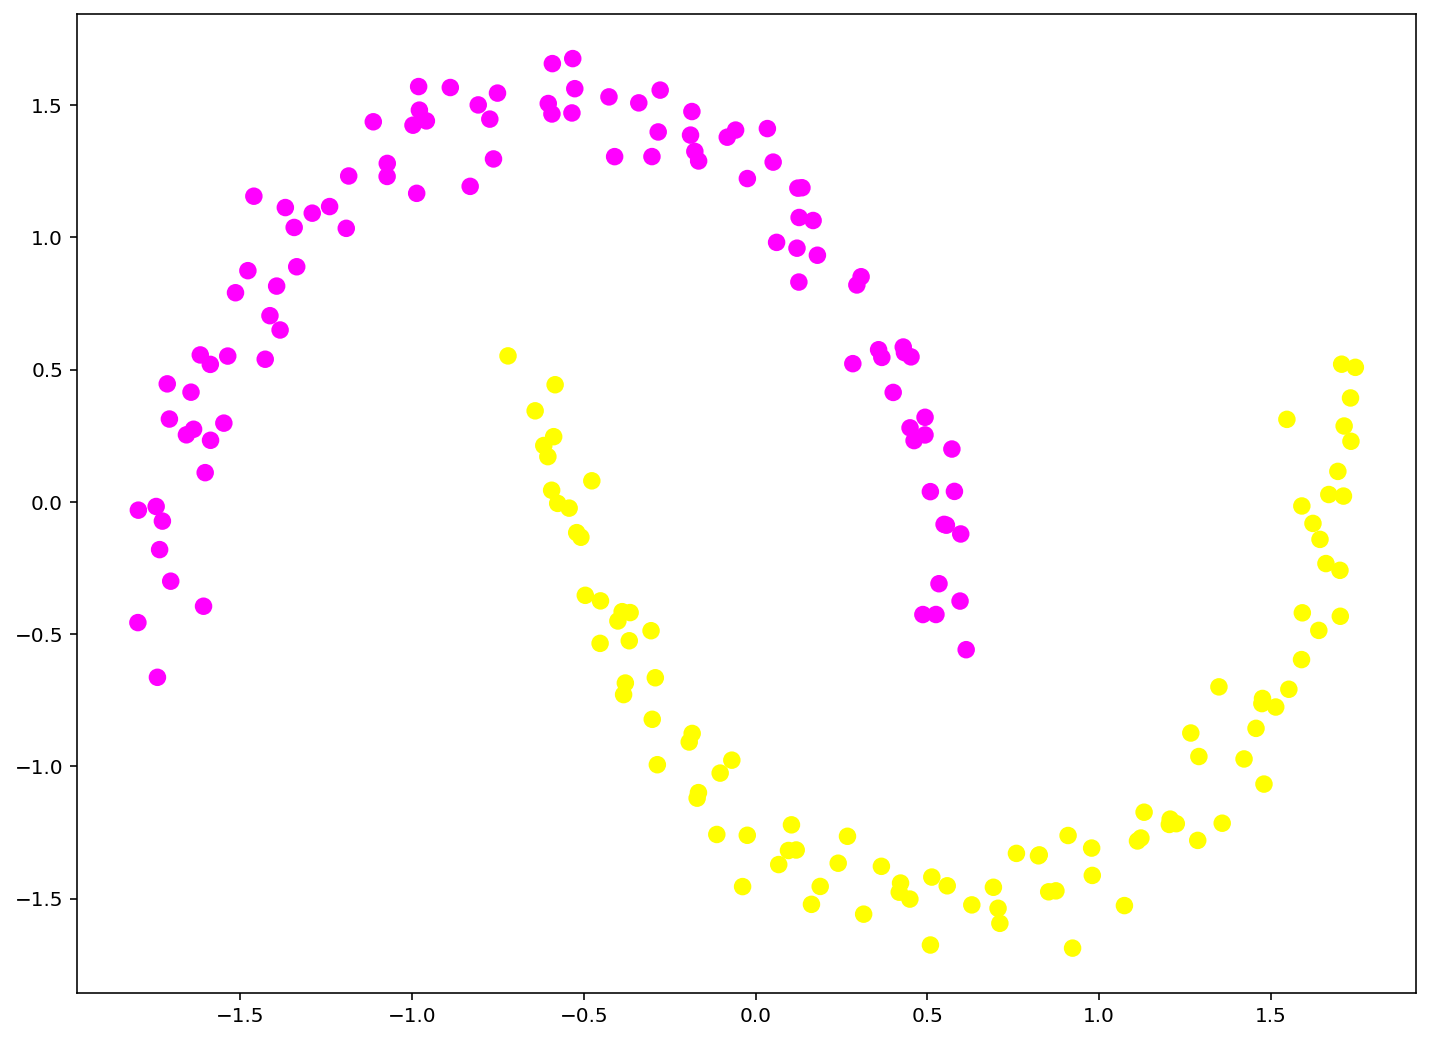

In [12]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='spring', s=60)

### Кластеризация

теперь кластеризуем с помощью различных методов

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [14]:
algorithms = [
    AffinityPropagation(),
    KMeans(n_clusters=2),
    AgglomerativeClustering(n_clusters=2),
    DBSCAN(),
]

сделаем случайное предсказание

In [15]:
clusters_random = np.random.randint(low=0, high=2, size=len(X))

и функцию-заготовку, которая считает 2 метрики качества и генерирует заголовки для графиков

In [16]:
def get_descr(algo_name, y, y_pred, X):
    return '{}\nARI {:.2f}\nSilhouette {:.2f}'.format(
        algo_name,
        adjusted_random_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

In [17]:
import warnings
warnings.filterwarnings('ignore')

проследите за ростом API и за падением Silhouette (хотя этот показатель по своему значению тоже должен расти)

NameError: name 'adjusted_random_score' is not defined

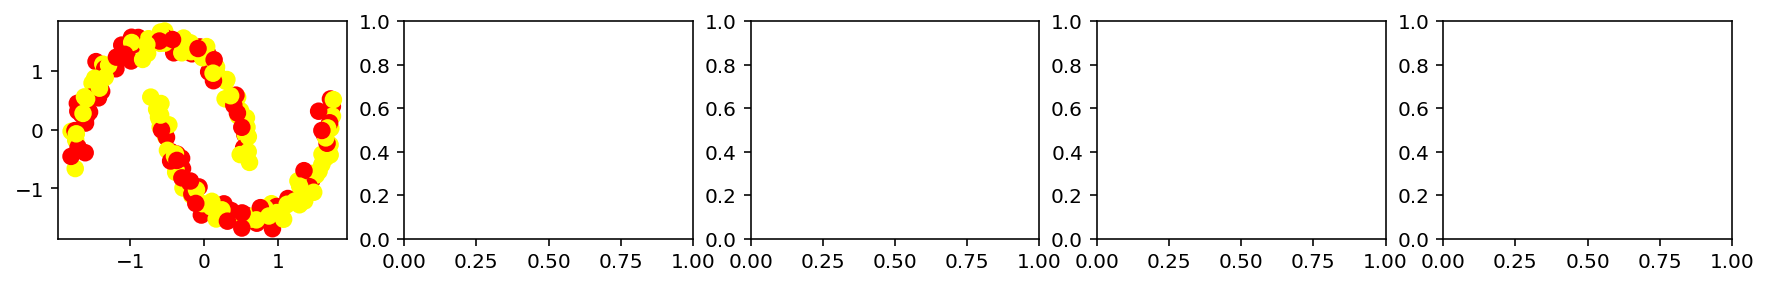

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(15, 2))
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_random, cmap='autumn', s=60)
axes[0].set_title(get_descr('Random', y, clusters_random, X_scaled))
for ax, algorithms in zip(axes[1:], algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithms.fit_predict(X_scaledled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60)
    ax.set_title(get_descr(algorithm.__class__.__name__, clusters, X_scaled))